# Introduction to Machine Learning: Logistic Regression and Naive Bayes

In this lesson, students will be introduced to the following concepts:
- Basics of Machine Learning,
- A simple pipeline of a typical machine learning project,
- A guided tour through a small sentence classification task that will incorporate:
    - NLTK Text Preprocessing
    - Logistic Regression
    - Naive Bayes

## What is Machine Learning?


Machine learning is a branch of artificial intelligence that involves building algorithms and statistical models that allow computers to learn from and make predictions or decisions based on data. The idea is to enable computers to identify patterns and relationships in data, and then use that knowledge to make predictions or decisions about new data. These algorithms can assist in processing and analyzing endless amounts of data that would normally be impossible to comprehend by human minds.

Machine learning is a rapidly growing field with a wide range of applications, including:
- image recognition
- natural language processing
- speech recognition
- recommendation systems
- Stock Price prediction
- Object detection systems

There are three primary types of machine learning algorithms:
- **Supervised learning**: The model is trained on data that is labelled i.e. each sample being categorized, before being made to predict unseen data. Supervised learning can be further divided into two types of prediction tasks:
    - <i>Classification</i>: The model is made to put each sample under one or more specific class labels, with the output being discrete. Eg: Student grade prediction, emotion recognition, semantic analysis, etc. Classification tasks can be of **Binary (classifying from two labels), or Multi-classification (classifying from multiple labels)**.
    - <i>Regression</i>: The model needs to predict a continuous output. Eg: Temperature, stock market prices, etc.
- **Unsupervised learning**: Unlabelled data is used to train the model, forcing it to self-extract patterns before prediction of unseen data.
- **Reinforcement learning**: During the process of training the data, a 'points' system is implemented wherein the model is rewarded for making correct predictions and penalized for incorrect ones.

Machine learning has the potential to transform industries and change the way we live and work. With it being an integral aspect of Natural Language Processing, it is important to become familiar with the fundamentals of machine learning in order to grasp future concepts that will be taught in this course.

For now, this lesson will not only serve as a guide to a basic procedure for preparing machine learning data, but also as an introduction to two popular supervised learning algorithms: 
- **Logistic Regression**
- **Naive Bayes**

## The Basic Pipeline of a Machine Learning Project

For any machine learning task, a model needs to be familiarized, or **trained** with the type of information it is being made to predict, hence requiring a substantial amount of data. Data exists in numerous forms, from videos and images to tables and audio clips. One cannot directly take this raw, unprocessed information and 'stuff' it into the model, expecting it to train like magic. This is where **data preprocessing** comes into play, in which information is cleaned, re-arranged, and converted for the model to easily read and train on without much noise/bias. These aforementioned concepts will be discussed further into this lesson.

A typical pipeline of a machine learning model involves:
1. Determining whether the task involves classification or regression, and collecting data based on the problem.
2. Data preprocessing: data cleaning, text preprocessing, omitting irrelevant information, format conversion, etc.
3. Determining the portions of data that will be used for:
    - **TRAINING**: The data samples that are fed to the model to familiarize itself with the type of problem and patterns it is expected to identify.
    - **VALIDATION**: (optional but highly recommended) During the training process, the model can be made to predict samples belonging to a 'validation' set, in order to evaluate the prediction performance and check room for improvement.
    - **TESTING**: The portion of data that is not known at all by the model, and will be used as the final measure of performance after the training/validation process is complete.
4. Tuning hyperparameters/settings of the machine learning algorithms,
5. Training and testing the models
6. Evaluation; if performance needs to be improved, repeat steps 1 to 3.

## I. Our First NLP Task: Sentiment Analysis

Sentiment analysis is the process of using natural language processing to extract subjective information from text/speech information. The goal of sentiment analysis is to determine the attitude, emotion, or opinion expressed in a piece of text, such as a social media post, customer review, or news article. 

Sentiment analysis algorithms typically use machine learning or deep learning techniques to analyze the text, which can involve identifying specific words, phrases, or patterns that are associated with positive, negative, or neutral sentiment. The output of sentiment analysis is often a numerical score or label that reflects the sentiment of the text, ranging from very negative to very positive, or neutral. 

Sentiment analysis is useful in a variety of applications, including market research, brand management, customer service, and political analysis, among others. It can provide valuable insights into public opinion, consumer behavior, and other trends, and can be used to inform decision-making and strategy development.

In this section, we will be using a dataset containing Amazon reviews for training 2 models and trying to predict the sentiment of each review, making this task a **SENTENCE CLASSIFICATION** problem. 

### 1. Importing Libraries

For our classification task, the following libraries will be utilized:
 - **pandas**: For dataset manipulation
 - **re**: REGEX tool for text preprocessing
 - **NLTK**: A vast library containing tools for text preprocessing, language modelling, vectorization, and tokenization.
 - **sklearn**: A machine learning library that consists of dozens of algorithms to experiment with, including Naive Bayes and Logistic Regression
 - **numpy**: An array manipulation library, consisting of tools for performing various array operations

In [164]:
### Importing Libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import re
import nltk
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score
import seaborn as sns
import numpy as np

### 2. Loading the Amazon Reviews Sentiment Dataset
**Source**: https://www.kaggle.com/datasets/tarkkaanko/amazon
#### Dataset Information:
- A dataset containing about 4900 customer reviews for products bought through Amazon, with a rating assigned to each of them. Other features concerning the username, time of rating, population stats, etc. are also present.

- The dataset seems to be in a csv format, so we use pandas's **read_csv()** function to read the file.

In [133]:
df = pd.read_csv('amazon_reviews.csv')
### Viewing the first 5 rows of the dataset to get a bettere look at it.
df.head(5)

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


We can view the dimensions of the dataset through the **shape** call.
- The first number in the output represents the number of rows, followed by the number of columns.

In [134]:
df.shape

(4915, 12)

### 3. Removing irrelevant data columns and empty rows
From the cell above, we get to know that the dataset contains 4915 review samples, and 12 features. 

- For this task, we are only interested in the 'overall' (which is the overall product rating), and 'reviewText' features.
- Let's slice the dataset through **df.loc** call, putting our focus only on the two aforementioned columns. We can also use the **df.drop** call to specify column names to eliminate.

In [141]:
df_refined = df.loc[:,'overall':'reviewText']
df_refined = df_refined.dropna()
df_refined = df_refined.reset_index()
df_refined = df_refined.loc[:,'overall':'reviewText']

In [142]:
### Viewing the sliced Dataset we will be working on:
df_refined.head(10)

,overall,reviewText
0,4.0,No issues.
1,5.0,"Purchased this for my device, it worked as adv..."
2,4.0,it works as expected. I should have sprung for...
3,5.0,This think has worked out great.Had a diff. br...
4,5.0,"Bought it with Retail Packaging, arrived legit..."
5,5.0,It's mini storage. It doesn't do anything els...
6,5.0,I have it in my phone and it never skips a bea...
7,5.0,It's hard to believe how affordable digital ha...
8,5.0,Works in a HTC Rezound. Was running short of ...
9,5.0,"in my galaxy s4, super fast card, and am total..."


### Exploratory Data Analysis

To gain a better frame of understanding of the information you are dealing with, it is important to perform analysis on the dataset. If one would like to take a look at the amount of products associated with each rating, we could use a plotting library like **seaborn** to get a good visual of the sample frequency of our dataset.

<AxesSubplot:xlabel='overall', ylabel='count'>

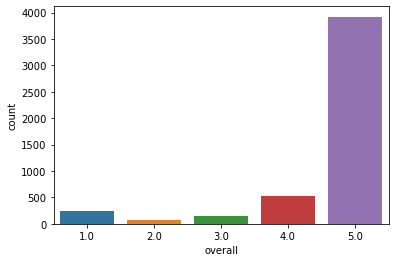

In [143]:
sns.countplot(x=df_refined["overall"])

From the visual above, we witness that the amount of 5 star products is much greater than that of the other ratings, resulting in an **imbalanced** dataset. An imbalanced dataset can lead to a machine learning phenomenon known as **overfitting**, wherein the model gets fed too many samples of one class, and ends up memorizing only the patterns associated with that class and nothing else. 

- We will later see how this data imbalance could potentially play a role in the model performance metrics after the testing phase.

### 4. Converting Numeric Ratings to Sentiment Categories

- The ratings in the 'overall' column represent a discrete label that come under '1.0', '2.0', '3.0', '4.0', '5.0' classes. 
- As we are mostly interested in the **sentiment** of the product rather than the specific rating, we want to further simplify these labels into **'Positive' and 'Negative'** classes.
- We use a conditional 'filter' to convert each rating to one of the aforementioned classes:
    - 1.0, 2.0 are converted to 'Negative'
    - 3.0, 4.0, and 5.0 are converted to 'Positive'

In [146]:
### Converting the rating labels
df_refined['overall'] = np.where(df_refined['overall'] == '5.0', 'Positive', df_refined['overall'])
df_refined['overall'] = np.where(df_refined['overall'] == '4.0', 'Positive', df_refined['overall'])
df_refined['overall'] = np.where(df_refined['overall'] == '3.0', 'Positive', df_refined['overall'])

df_refined['overall'] = np.where(df_refined['overall'] == '2.0', 'Negative', df_refined['overall'])
df_refined['overall'] = np.where(df_refined['overall'] == '1.0', 'Negative', df_refined['overall'])

In [147]:
df_refined.head(10)

,overall,reviewText
0,Positive,No issues.
1,Positive,"Purchased this for my device, it worked as adv..."
2,Positive,it works as expected. I should have sprung for...
3,Positive,This think has worked out great.Had a diff. br...
4,Positive,"Bought it with Retail Packaging, arrived legit..."
5,Positive,It's mini storage. It doesn't do anything els...
6,Positive,I have it in my phone and it never skips a bea...
7,Positive,It's hard to believe how affordable digital ha...
8,Positive,Works in a HTC Rezound. Was running short of ...
9,Positive,"in my galaxy s4, super fast card, and am total..."


### 5. Text Preprocessing

In order to reduce bias, chances of overfitting and confusion within the models, we want to simplify the review text through:
- Converting to lowercase
- Removing stopwords such as 'the', 'a', 'an', 'in', 'on', etc. to reduce noise
- Lemmatization/Stemming: Simplifying the word to its root. Example: 'Running' simplifies to the root word 'run'.
- Removing punctuation through REGEX
- tokenization: Splitting text into words

Of course, there is no hard-and-fast rule as to how text should be preprocessed. In fact, it is very possible that not performing one or more of the aforementioned steps can lead to better results, depending on the problem.

### Importing NLTK stopwords and Lemmatization data
Using the stopwords/Lemma in the NLTK database as a reference, we can simplify our review texts to reduce potential confusion/overfitting.

In [148]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\brown\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\brown\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\brown\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

### Preprocessing begins

- Now we perform the stopword/punctuation removal, along with lemmatization of the words.
- This process may take a significant amount of time.

In [149]:
### Text Preprocessing
df_refined['reviewText'] 

for i in range(len(df_refined['reviewText'])) :
    review = df_refined.loc[i, 'reviewText']
    review = review.lower() 
    review = re.sub(r'[^\w\s]', '', review)
    tokenList = word_tokenize(review)
    
    ##Lemmatizer
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokenList]

    tokenList2 = [word for word in lemmatized_tokens if not word in stopwords.words()]
    df_refined.loc[i, 'reviewText'] = ' '.join(lemmatized_tokens)

In [150]:
df_refined.head(10)

,overall,reviewText
0,Positive,no issue
1,Positive,purchased this for my device it worked a adver...
2,Positive,it work a expected i should have sprung for th...
3,Positive,this think ha worked out greathad a diff bran ...
4,Positive,bought it with retail packaging arrived legit ...
5,Positive,it mini storage it doesnt do anything else and...
6,Positive,i have it in my phone and it never skip a beat...
7,Positive,it hard to believe how affordable digital ha b...
8,Positive,work in a htc rezound wa running short of spac...
9,Positive,in my galaxy s4 super fast card and am totally...


### Splitting the dataset into Training, Validation and Test sets

- We use sklearn's **train_test_split** to achieve a 70/15/15 train-validation-test split on our dataset.
- This means that 70% of the 4915 samples will be training samples, 15% for validation, and another 15% will be the unseen test samples.
- Our feature will be the review text, while the labels will be the values in the 'overall' column.

In [151]:
from sklearn.model_selection import train_test_split
X = df_refined['reviewText']
y = df_refined['overall']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=1)

### 6. Vectorization: Bag of Words

- As the reviews are written in natural human language, the words would need to be converted into numerical features for the model to understand. This process is also known as **vectorization**.

- Several Vectorization techniques exist depending on the task at hand, considering factors like semantic context, position, frequency, connotation, etc. to convert each word into a unique vector.

- For our task, the **Bag of Words (BOW)** model will be utilized for sentiment analysis. The BOW technique is a vectorization method that splits up each sentence or portion of text into a 'bag' of words, in which each word represents an individual feature of the produced vector. The frequency of each word within the text corresponds to the value within the vector itself.

- We will use Sklearn's **CountVectorizer** function, which functions the same as a Bag of Words algorithm, to convert each sentence into vectors to be fed to the models.
    - **NOTE**: When it comes to vectorization, the vectorizing model should only be fitted onto the training data, and NOT the test data. Since the test data is completely unknown to us and thus cannot be analyzed for numeric conversion by the model upon feeding, we vectorize the unseen data from the information the model has by fitting on the train data.

In [152]:
from sklearn.feature_extraction.text import CountVectorizer

In [153]:
bow = CountVectorizer()
bow.fit(X_train)

training_data = bow.transform(X_train)
val_data = bow.transform(X_val)
test_data = bow.transform(X_test)

## Machine Learning Models

### 7. Logistic Regression

- Logistic regression is a statistical technique used to model the relationship between a binary dependent variable and one or more independent variables. It is a type of regression analysis commonly used in various fields, including business, medicine, psychology, and social sciences, to predict the probability of a certain event occurring.

- The primary goal of logistic regression is to determine the relationship between the dependent variable (the output) and the independent variables (features) by estimating the probability of the dependent variable taking a certain value, given a specific set of values of the independent variables. The dependent variable in logistic regression is dichotomous, meaning that it can only take on two possible values, such as yes/no or success/failure.

- Logistic regression uses a mathematical function called the **logistic function or sigmoid** function to model the relationship between the independent variables and the dependent variable. The output of the logistic regression model is a probability score ranging from 0 to 1, which represents the likelihood of the dependent variable taking a certain value.

- Thus, despite the name implications, **Logistic Regression** is usually seen as a **classification model**.


#### Training the model

In [159]:
lr = LogisticRegression(penalty='l2', dual=False, tol=0.0001,
                       C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs',
                       max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
lrFit = lr.fit(training_data, y_train)

#### Validating the model and analyzing the accuracy and precision metrics

- **Accuracy**: A measure of the portion of correct prediction made on the dataset, compared to the original labelled data.
- **Precision**: A measure of how close (or precise) the predictions are to each other.

In [167]:
predictions = lrFit.predict(val_data)
print('Accuracy: ' ,accuracy_score(y_val, predictions))
print('Precision: ',precision_score(y_val,predictions, pos_label="Positive"))

Accuracy:  0.9436046511627907
Precision:  0.9555961070559611


It seems that the metrics achieved on the validation set are high enough for us to move on to evaluating the test set performance.

#### Test Set Performance

Accuracy:  0.9532203389830508
Precision:  0.9587412587412587


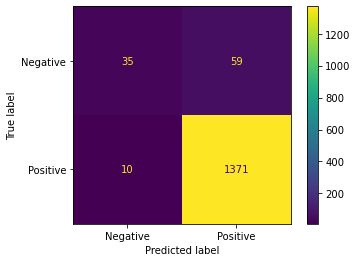

In [170]:
test_predictions = lrFit.predict(test_data)
print('Accuracy: ' ,accuracy_score(y_test, test_predictions))
print('Precision: ',precision_score(y_test , test_predictions, pos_label="Positive"))

cm = confusion_matrix(y_test, test_predictions, labels=lrFit.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lrFit.classes_)

disp.plot()

### 8. Naive Bayes and Gaussian Classifier

- **Naive Bayes** is a simple and efficient algorithm that is commonly used in natural language processing, spam filtering, and sentiment analysis. It is based on the assumption that the presence or absence of a feature is independent of the presence or absence of any other feature, hence the term "naive". The algorithm calculates the probability of each class given the input features and selects the class with the highest probability as the output.

- **Gaussian Classifier** is a type of Naive Bayes algorithm that assumes that the probability distribution of the input features is Gaussian (normal). This means that the algorithm assumes that the features follow a bell-shaped curve, which is a common assumption in many real-world scenarios. Gaussian Classifier is often used in image recognition and computer vision tasks, where the features can be represented as pixel values, and the assumption of Gaussian distribution can be reasonable.

- The Gaussian Classifier calculates the mean and variance of each feature for each class and uses them to calculate the probability of each class given the input features. It assumes that the probability distribution of each feature in each class is Gaussian and calculates the probability of the feature given the class using the mean and variance of the feature in that class. The algorithm then multiplies the probabilities of all the features to calculate the probability of the input belonging to each class and selects the class with the highest probability as the output.

#### Training the model

In [175]:
GB = GaussianNB()
GBFit = GB.fit(training_data.toarray(), y_train)

#### Validation

In [176]:
predictions = GBFit.predict(val_data.toarray())
print('Accuracy: ' ,accuracy_score(y_val, predictions))
print('Precision: ',precision_score(y_val,predictions, pos_label="Positive"))

Accuracy:  0.8180232558139535
Precision:  0.9313593539703903


#### Test Set Performance

Accuracy:  0.8264406779661017
Precision:  0.935708752904725


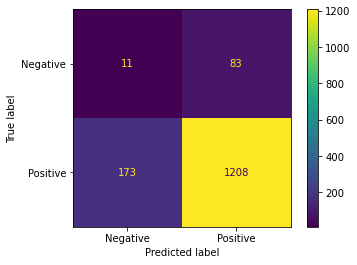

In [178]:
test_predictions = GBFit.predict(test_data.toarray())
print('Accuracy: ' ,accuracy_score(y_test, test_predictions))
print('Precision: ',precision_score(y_test , test_predictions, pos_label="Positive"))

cm = confusion_matrix(y_test, test_predictions, labels=GBFit.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GBFit.classes_)

disp.plot()

# FOOD FOR THOUGHT

1. Looking at the confusion matrices above, do you think these results are a good indicator of the models' performance? Why or Why not?
2. Search for alternative methods that are used to reduce overfitting and data imbalance.
3. Could Logistic Regression and Gaussian classifier be used for Regression tasks?
4. Compare and contrast the scores of the Log regression and Gaussian models. How could the Gaussian model's accuracy be improved?

# CONCLUSION

By the end of this lesson, you have hopefully grasped some of the base concepts of the machine learning process. With this being the stepping stone to a much wider realm of knowledge, the next chapters will delve into the concepts of a more complex and powerful aspect of Artificial intelligence that focuses on trying to emulate the human brain itself: **Deep Learning**!